In [ ]:
# === Data Exploration and Preparation ===

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telco_customer_churn.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Flag,Tenure Bucket,Estimated Lifetime Value (LTV)
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-3,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,25+,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-3,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,25+,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-3,141.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerID                      7043 non-null   object 
 1   gender                          7043 non-null   object 
 2   SeniorCitizen                   7043 non-null   int64  
 3   Partner                         7043 non-null   object 
 4   Dependents                      7043 non-null   object 
 5   tenure                          7043 non-null   int64  
 6   PhoneService                    7043 non-null   object 
 7   MultipleLines                   7043 non-null   object 
 8   InternetService                 7043 non-null   object 
 9   OnlineSecurity                  7043 non-null   object 
 10  OnlineBackup                    7043 non-null   object 
 11  DeviceProtection                7043 non-null   object 
 12  TechSupport                     70

In [5]:
df.isnull().sum()

customerID                        0
gender                            0
SeniorCitizen                     0
Partner                           0
Dependents                        0
tenure                            0
PhoneService                      0
MultipleLines                     0
InternetService                   0
OnlineSecurity                    0
OnlineBackup                      0
DeviceProtection                  0
TechSupport                       0
StreamingTV                       0
StreamingMovies                   0
Contract                          0
PaperlessBilling                  0
PaymentMethod                     0
MonthlyCharges                    0
TotalCharges                      0
Churn                             0
Churn Flag                        0
Tenure Bucket                     0
Estimated Lifetime Value (LTV)    0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
# Drop 'Churn' (target) and 'customerID' (not predictive) from feature set
from sklearn.preprocessing import LabelEncoder

df_model = df.drop(columns=["Churn", "customerID"])
copy_text = df_model.copy()  # keep a text (pre-encoding) copy for readable plots

In [8]:
# Label-encode object columns
obj_cols = df_model.select_dtypes(include=['object']).columns
df_model[obj_cols] = df_model[obj_cols].apply(LabelEncoder().fit_transform)

In [9]:
# Quick stats on key numeric columns + info
print(df_model[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T)
print()
df_model[["tenure", "MonthlyCharges", "TotalCharges"]].info()

                 count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00     9.0    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25    35.5    70.35   
TotalCharges    7043.0  3257.794122  1888.693496   0.00  1609.0  3249.00   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    4901.50  6530.00  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


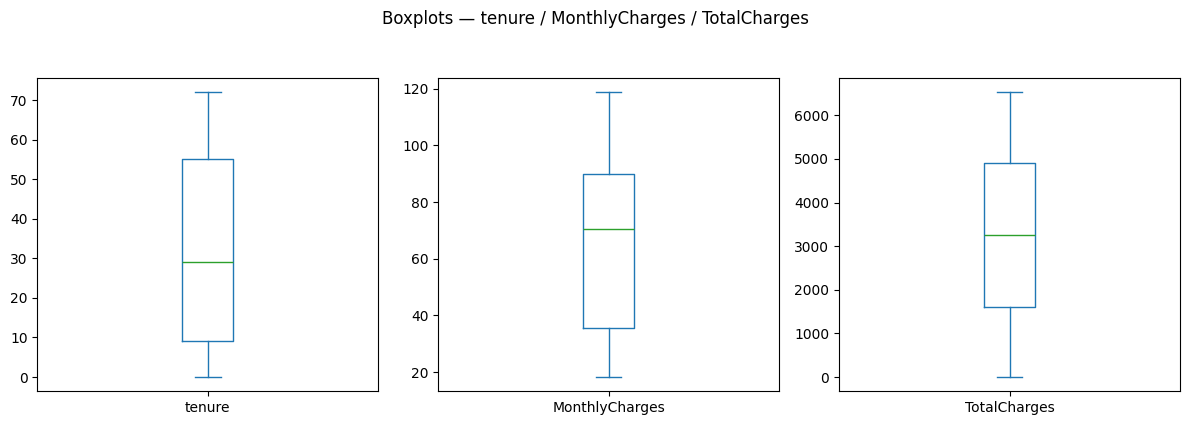

In [10]:
# === Visuals: boxplots to eyeball outliers ===
import matplotlib.pyplot as plt

df_model[["tenure", "MonthlyCharges", "TotalCharges"]].plot(
    kind='box', subplots=True, layout=(1,3), figsize=(12,4), sharex=False, sharey=False
)
plt.suptitle("Boxplots — tenure / MonthlyCharges / TotalCharges", y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
# === Assumptions and Decisions ===
# CustomerID → dropped, no predictive value.
# Churn → mapped to 0/1 and stored in a separate variable to avoid leakage into the model.
# TotalCharges → was text with blanks; cleaned, converted to numeric, and filled missing values with the median.
# Text columns → normalized and encoded.
# Missing values & duplicates → checked after every step; duplicates removed when found.
# Visuals → used boxplots to spot outliers.
# Contracts → pulled counts and percentages from the text copy (before encoding) for easier reading.
# === Next Steps ===

In [11]:
# === Contract distribution from the text copy (more readable before encoding) ===
print(copy_text["Contract"].value_counts())
print((copy_text["Contract"].value_counts(normalize=True) * 100).astype(int).astype(str) + "%")

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Contract
Month-to-month    55%
Two year          24%
One year          20%
Name: proportion, dtype: object


In [ ]:
# === Exploratory Data Analysis (EDA) ===

In [14]:
# Merge target back with the readable (text) copy just for plotting
import matplotlib.pyplot as plt

target = df["Churn"]  # Define the target variable
df_plot_text = pd.concat([copy_text, target.rename("Churn")], axis=1)

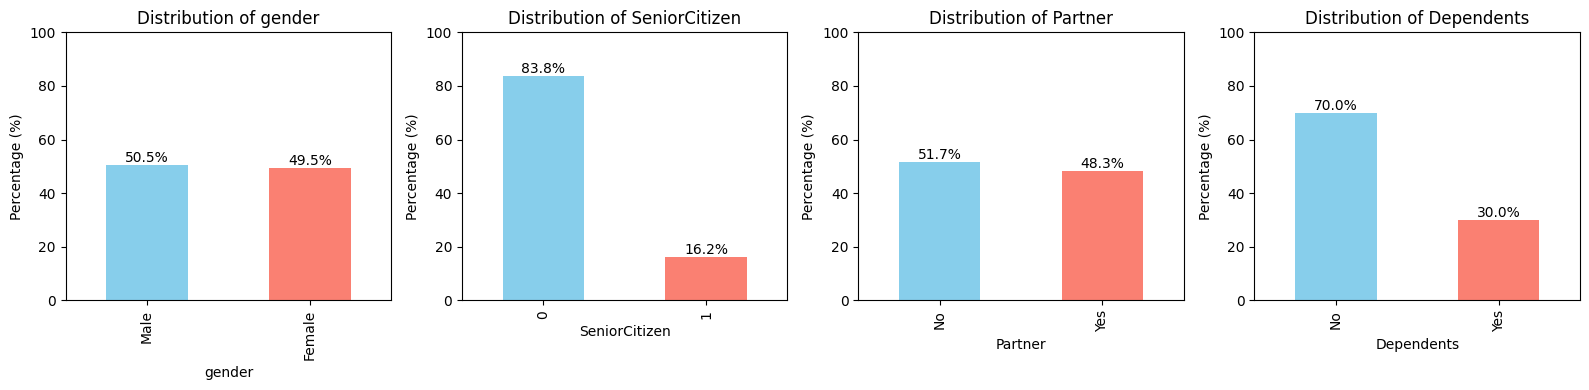

In [15]:
# Basic demographics distribution
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for i, col in enumerate(["gender", "SeniorCitizen", "Partner", "Dependents"]):
    dist = df_plot_text[col].value_counts(normalize=True) * 100
    dist.plot(kind="bar", ax=axes[i], color=["skyblue", "salmon"])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Percentage (%)")
    axes[i].set_ylim(0, 100)
    for idx, val in enumerate(dist):
        axes[i].text(idx, val+1, f"{val:.1f}%", ha='center')
plt.tight_layout(); plt.show()

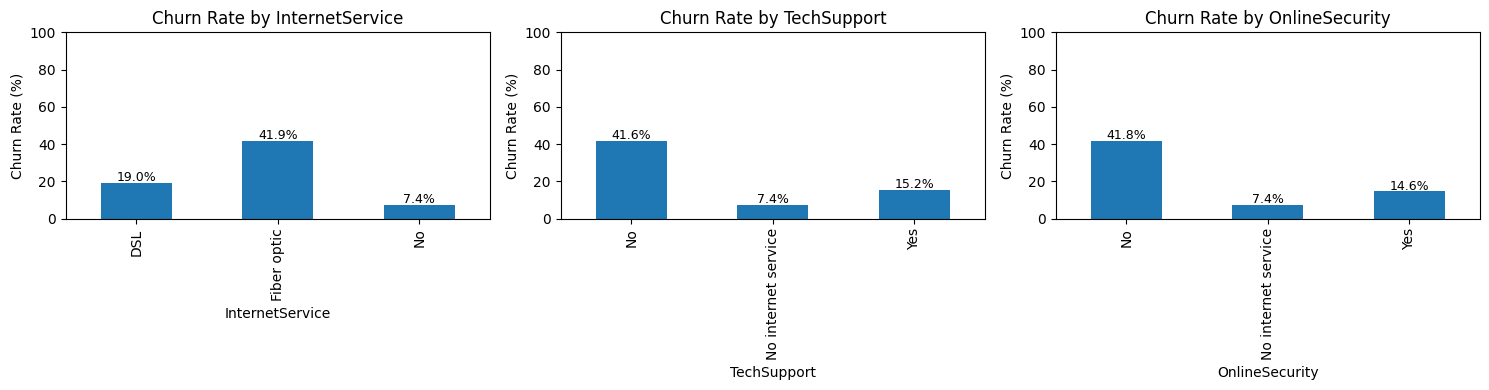

In [18]:
# Churn rate by services
service_cols = ["InternetService", "TechSupport", "OnlineSecurity"]

# Convert 'Churn' column to numeric (1 for "Yes", 0 for "No")
df_plot_text["Churn"] = df_plot_text["Churn"].map({"Yes": 1, "No": 0})

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(service_cols):
    churn_rates = df_plot_text.groupby(col)["Churn"].mean() * 100
    churn_rates.plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].set_ylabel("Churn Rate (%)")
    axes[i].set_ylim(0, 100)
    for idx, val in enumerate(churn_rates.values):
        axes[i].text(idx, val + 1, f"{val:.1f}%", ha="center", fontsize=9)
plt.tight_layout(); plt.show()

In [ ]:
# Takeaways (for Sales):
# 1) Fiber users churn more → pricier service; consider promos/better deals.
# 2) No Tech Support? churn jumps → invest in support.
# 3) No Online Security? churn ~41.8% vs ~14.8% with it → easy upsell saves churn.

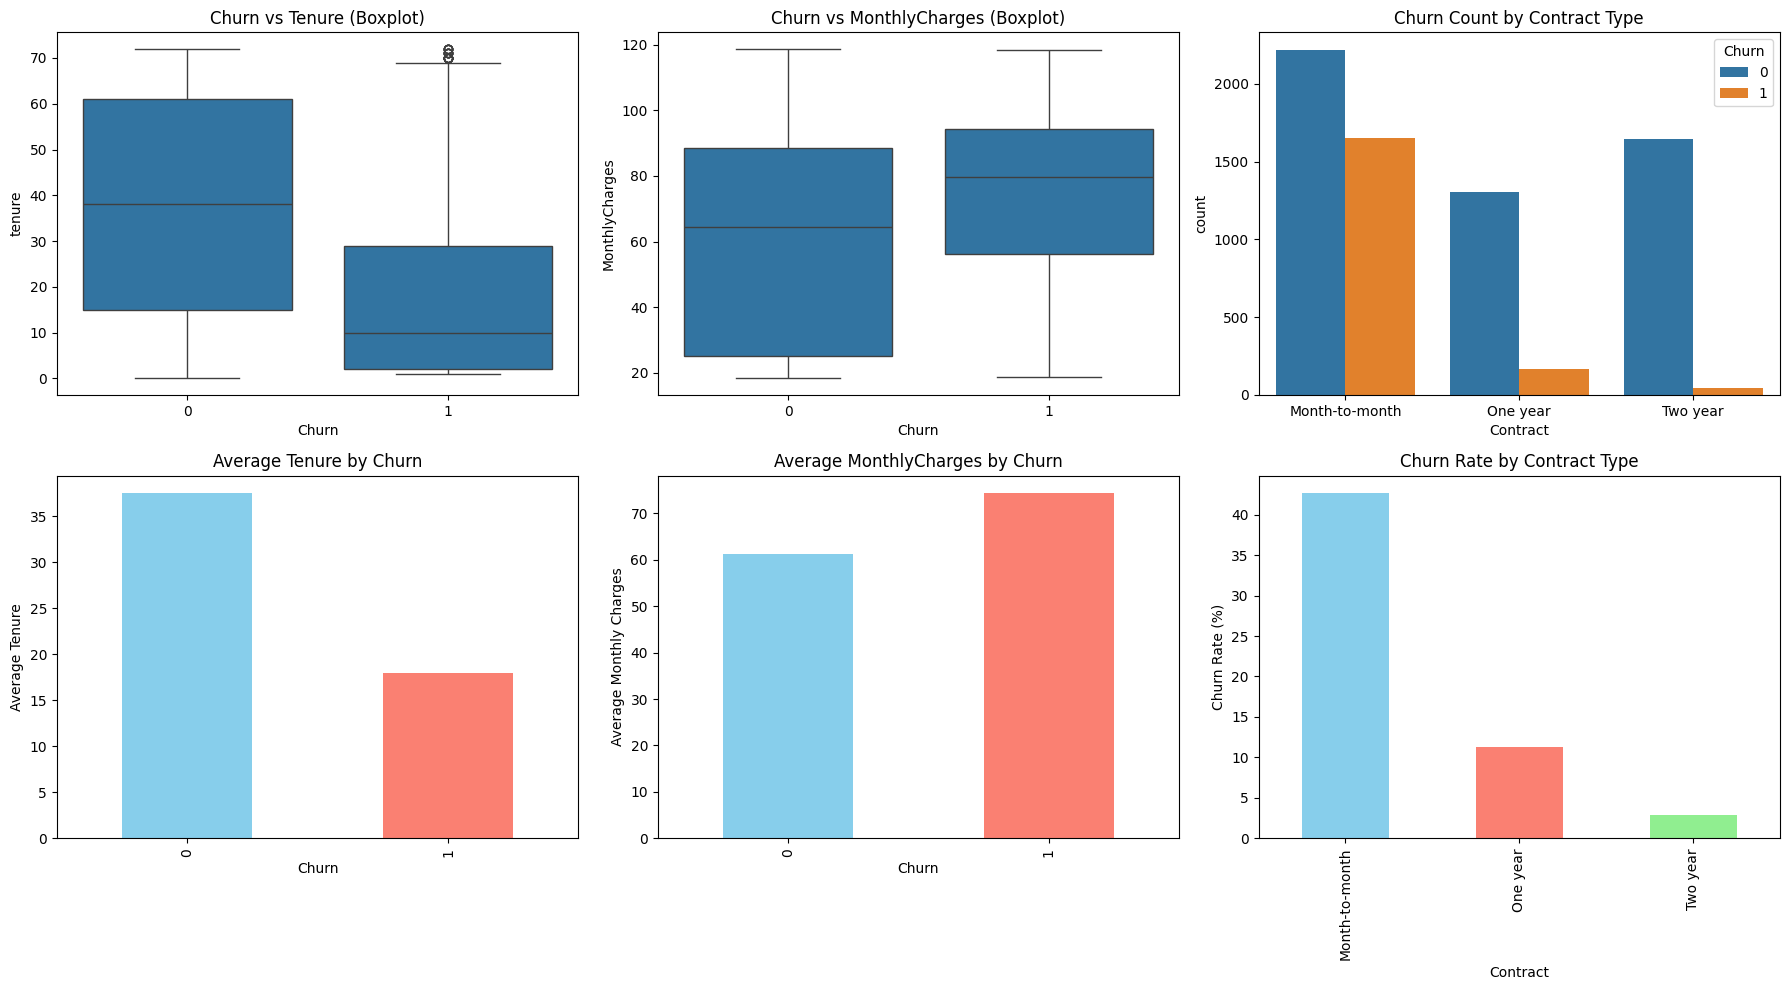

In [20]:
# Tenure / MonthlyCharges / Contract vs Churn
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Tenure
sns.boxplot(x="Churn", y="tenure", data=df_plot_text, ax=axes[0,0])
axes[0,0].set_title("Churn vs Tenure (Boxplot)")
df_plot_text.groupby("Churn")["tenure"].mean().plot(kind="bar", ax=axes[1,0], color=["skyblue","salmon"])
axes[1,0].set_title("Average Tenure by Churn")
axes[1,0].set_ylabel("Average Tenure")

# MonthlyCharges
sns.boxplot(x="Churn", y="MonthlyCharges", data=df_plot_text, ax=axes[0,1])
axes[0,1].set_title("Churn vs MonthlyCharges (Boxplot)")
df_plot_text.groupby("Churn")["MonthlyCharges"].mean().plot(kind="bar", ax=axes[1,1], color=["skyblue","salmon"])
axes[1,1].set_title("Average MonthlyCharges by Churn")
axes[1,1].set_ylabel("Average Monthly Charges")

# Contract
sns.countplot(x="Contract", hue="Churn", data=df_plot_text, ax=axes[0,2])
axes[0,2].set_title("Churn Count by Contract Type")
churn_by_contract = df_plot_text.groupby("Contract")["Churn"].mean()*100
churn_by_contract.plot(kind="bar", ax=axes[1,2], color=["skyblue","salmon","lightgreen"])
axes[1,2].set_title("Churn Rate by Contract Type")
axes[1,2].set_ylabel("Churn Rate (%)")

plt.tight_layout(); plt.show()

In [ ]:
# TL;DR for Sales:
# - Short-tenure folks churn more; long-tenure barely leave (loyal).
# - Higher monthly bill = higher churn.
# - Month-to-month = churn magnet; annual/2-year are sticky.

== IQR bounds per Churn group ==
   Churn    Q1    Q3   IQR  LowerBound  UpperBound  OutliersCount  Total
0      0  15.0  61.0  46.0       -54.0       130.0              0   5174
1      1   2.0  29.0  27.0       -38.5        69.5             23   1869

== tenure outlier rows (head) ==
      Churn  tenure  Group
811       1      70      1
1306      1      70      1
2879      1      70      1
3517      1      70      1
5697      1      70      1
5441      1      70      1
5579      1      70      1
5841      1      70      1
6537      1      70      1
6945      1      70      1
6038      1      70      1
6398      1      71      1
5702      1      71      1
4149      1      71      1
3040      1      71      1
975       1      71      1
6290      1      71      1
4513      1      72      1
4610      1      72      1
3439      1      72      1


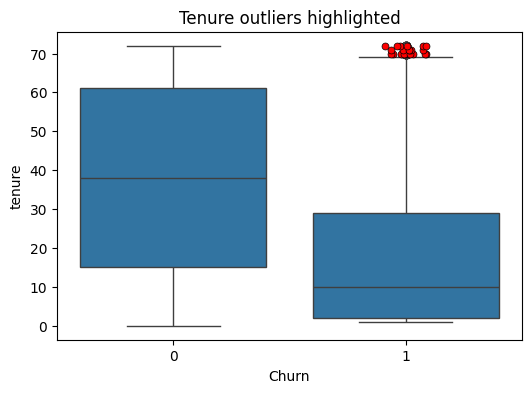

In [21]:
# === Outliers by-group using IQR on tenure vs Churn ===
import pandas as pd

def iqr_outliers_by_group(df_in, value_col, group_col, k=1.5):
    out_idx, rows_per_group, stats = [], [], []
    for g, sub in df_in.groupby(group_col):
        q1 = sub[value_col].quantile(0.25)
        q3 = sub[value_col].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - k*iqr, q3 + k*iqr
        mask = (sub[value_col] < lower) | (sub[value_col] > upper)
        stats.append({
            group_col: g, "Q1": q1, "Q3": q3, "IQR": iqr,
            "LowerBound": lower, "UpperBound": upper,
            "OutliersCount": int(mask.sum()), "Total": len(sub)
        })
        out_idx.extend(sub[mask].index.tolist())
        if mask.any():
            rows_per_group.append(sub.loc[mask, [group_col, value_col]].assign(Group=g))
    stats_df = pd.DataFrame(stats)
    outliers_df = pd.concat(rows_per_group, axis=0).sort_values(by=value_col) if rows_per_group else pd.DataFrame()
    return outliers_df, stats_df

tenure_outliers, tenure_stats = iqr_outliers_by_group(df_plot_text, value_col="tenure", group_col="Churn", k=1.5)
print("== IQR bounds per Churn group ==")
print(tenure_stats)
print("\n== tenure outlier rows (head) ==")
print(tenure_outliers.head(20))

# highlight outliers on top of the boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df_plot_text)
if not tenure_outliers.empty:
    sns.stripplot(
        x="Churn", y="tenure",
        data=df_plot_text.loc[tenure_outliers.index],
        jitter=True, marker="o", edgecolor="k", linewidth=0.5, color="red"
    )
plt.title("Tenure outliers highlighted")
plt.show()

In [22]:
# === Remove tenure outliers from numeric df (and target) ===
def iqr_outlier_mask_by_target(df_num, y, value_col="tenure", k=1.5):
    tmp = pd.concat([df_num[[value_col]].rename(columns={value_col:"val"}), y.rename("Churn")], axis=1)
    mask = pd.Series(False, index=df_num.index)
    for g, sub in tmp.groupby("Churn"):
        q1 = sub["val"].quantile(0.25)
        q3 = sub["val"].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - k*iqr, q3 + k*iqr
        mask.loc[sub.index] = (sub["val"] < lower) | (sub["val"] > upper)
    return mask

mask_out = iqr_outlier_mask_by_target(df_model, target, value_col="tenure", k=1.5)
df_trim = df_model.loc[~mask_out].reset_index(drop=True)
target_trim = target.loc[~mask_out].reset_index(drop=True)

print(f"Before: {len(df_model)} rows")
print(f"Removed outliers: {mask_out.sum()} rows")
print("After shapes:", df_trim.shape, target_trim.shape)

Before: 7043 rows
Removed outliers: 23 rows
After shapes: (7020, 22) (7020,)


In [ ]:
#=== Tenure ===
# 1 - Customers with short subscription periods churn more.
# 2 - Customers with long subscriptions rarely churn (shows stronger loyalty).

#=== Monthly Charges ===
# 1 - The higher the monthly bill, the higher the chance of churn.
# 2 - Customers with medium or low charges churn less.

# === Contract Type ===
# 1 - Month-to-month contracts have the highest churn.
# 2 - Yearly or longer contracts rarely churn since customers are locked in.

In [ ]:
# === Top 5 Variables Influencing Customer Churn ===

In [ ]:
# === Monthly Charges ===
# Customers with high bills are more likely to churn.
# Price has both a psychological and financial impact on customer decisions.
 
# === Tenure ===
# New customers churn much more often than long-term customers.
# It’s a key predictor, especially during the first year.

# === Contract Type ===
# Month-to-month contracts have the highest churn compared to yearly or longer terms.
# Strong influence since the contract directly defines customer commitment.

# === Tech Support ===
# Lack of technical support is strongly linked to higher churn.
# Customer support is critical for satisfaction and retention.

# === Online Security ===
# Customers without online security services churn more.
# Extra security boosts customer value perception and trust.